# Problem Statement
You have been hired as a consultant for a start-up that is analyzing targeted marketing ads on facebook.  We want to analyze the customer behavior by seeing whether or not they clicked on the ad, which we have in a .csv file with the following columns:
> 
Inputs:
-  Name
-  Email
-  Country
-  Time spent on site(facebook)
-  Salary


> 
Output:
-  Clicked(1: customer clicked on the ad, 0: customer did not click on the ad)


In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
facebook = pd.read_csv('./Facebook_Ads_2.csv', encoding='cp1252')

In [3]:
facebook.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [4]:
facebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
Names                 499 non-null object
emails                499 non-null object
Country               499 non-null object
Time Spent on Site    499 non-null float64
Salary                499 non-null float64
Clicked               499 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


In [5]:
print("Total number of people: {}".format(len(facebook)))
print("number of people who clicked on Ad: {}".format(len(facebook[facebook['Clicked'] == 1])))
print("number of customers who did not click on Ad: {}".format(len(facebook[facebook['Clicked'] == 0])))

Total number of people: 499
number of people who clicked on Ad: 250
number of customers who did not click on Ad: 249


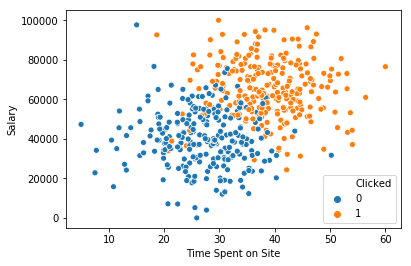

In [6]:
sns.scatterplot(facebook['Time Spent on Site'], facebook['Salary'], hue = facebook['Clicked'])

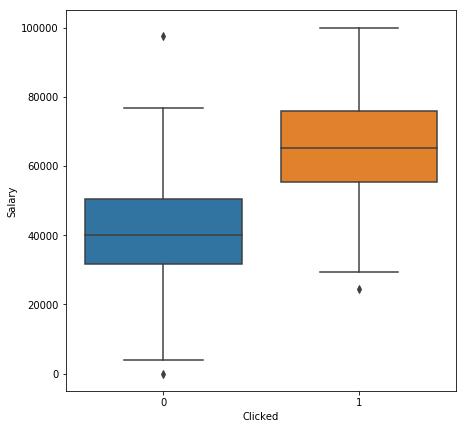

In [16]:
plt.figure(figsize = (7, 7))
sns.boxplot(x = 'Clicked', y = 'Salary', data = facebook);

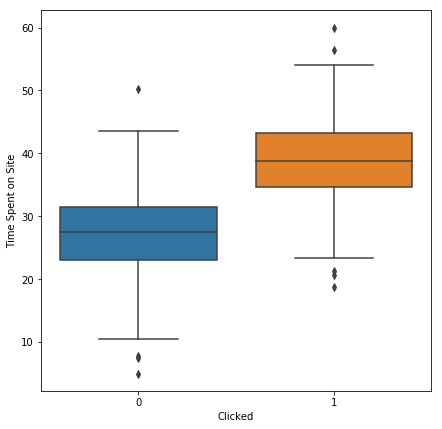

In [17]:
plt.figure(figsize = (7, 7))
sns.boxplot(x = 'Clicked', y = 'Time Spent on Site', data = facebook);

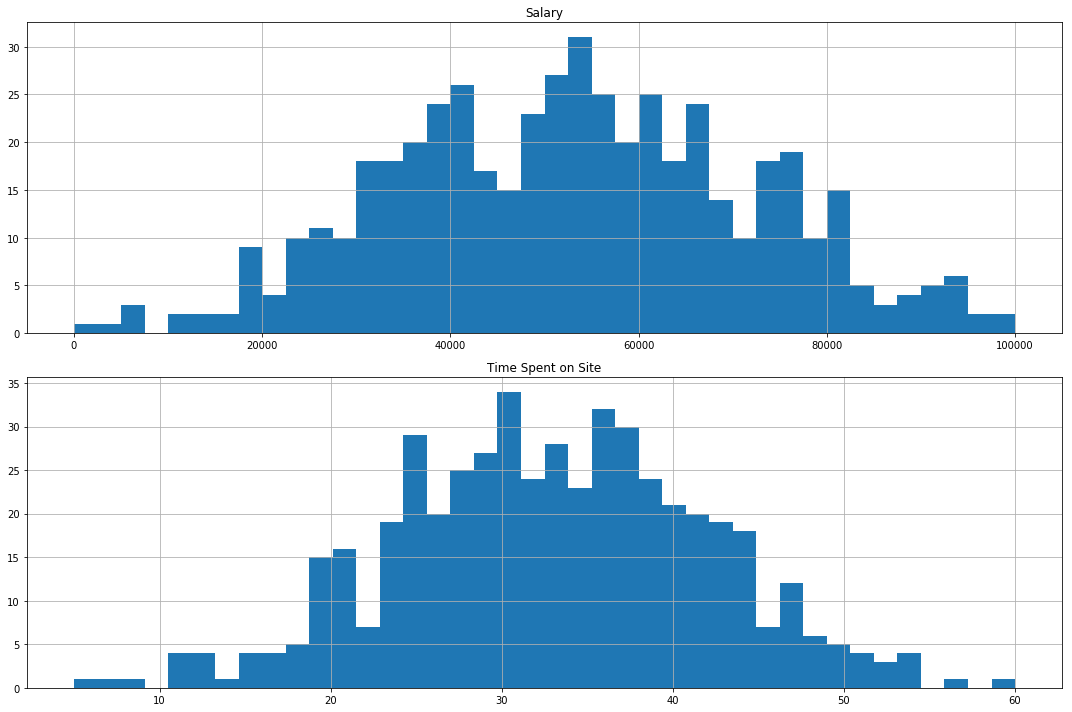

In [55]:

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (15, 10))
type(ax1)
facebook['Salary'].hist(ax = ax1, bins = 40)
ax1.set_title('Salary')



facebook['Time Spent on Site'].hist(ax = ax2, bins = 40)
ax2.set_title('Time Spent on Site')

plt.tight_layout()

In [58]:
# Dropping non-numerical features
facebook.drop(columns = ['Names', 'emails', 'Country'], axis = 1, inplace=True)

In [63]:
# Setting up our target variable and feature matrix
X = facebook.drop('Clicked', axis = 1).values
y = facebook.Clicked.values

print(type(X), X.shape)
print(type(y), y.shape)

<class 'numpy.ndarray'> (499, 2)
<class 'numpy.ndarray'> (499,)


In [64]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [67]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [69]:
# Fitting the model - logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

True Positives: 185
False Positives: 13
False Negatives: 17
True Negatives: 184

Accuracy on the training set: 0.924812030075188


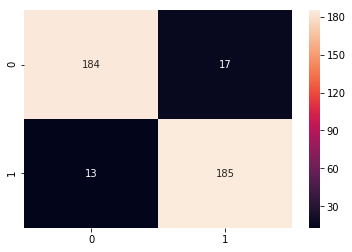

In [100]:
# Testing the model
from sklearn.metrics import classification_report, confusion_matrix
train_preds = classifier.predict(X_train)

cm = confusion_matrix(y_train, train_preds)
tn, fn, fp, tp = cm.ravel()

print('True Positives: {}'.format(tp) + '\n' + 'False Positives: {}'.format(fp) + '\n' + 
      'False Negatives: {}'.format(fn) + '\n' + 'True Negatives: {}'.format(tn) + '\n')
print('Accuracy on the training set: {}'.format(classifier.score(X_train, y_train)))

sns.heatmap(cm, annot = True, fmt = 'd')


True Positives: 43
False Positives: 9
False Negatives: 5
True Negatives: 43

Accuracy on the test set: 0.86


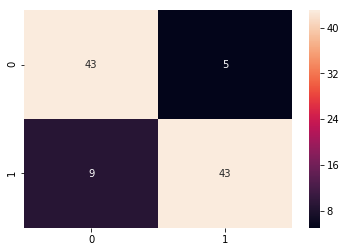

In [102]:
test_preds = classifier.predict(X_test)
cm = confusion_matrix(y_test, test_preds)
tn, fn, fp, tp = cm.ravel()

print('True Positives: {}'.format(tp) + '\n' + 'False Positives: {}'.format(fp) + '\n' + 
      'False Negatives: {}'.format(fn) + '\n' + 'True Negatives: {}'.format(tn) + '\n')
print('Accuracy on the test set: {}'.format(classifier.score(X_test, y_test)))
sns.heatmap(cm, annot = True, fmt = 'd')

In [78]:
print(classification_report(y_test, test_preds))

             precision    recall  f1-score   support

          0       0.83      0.90      0.86        48
          1       0.90      0.83      0.86        52

avg / total       0.86      0.86      0.86       100



In [110]:
# Visualizing the 'Decision Boundary'
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
# Create a meshgrid ranging from the minimum to maximum value for both features

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

X1.shape


(715, 753)

(-3.772486280189931, 3.3675137198099168)

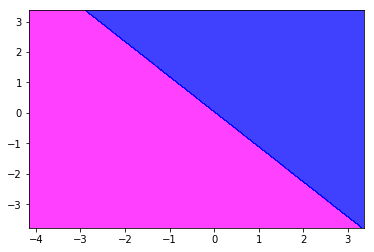

In [112]:
# plot the boundary using the trained classifier
# Run the classifier to predict the outcome on all pixels with resolution of 0.01
# Coloring the pixels with 0 or 1
# If classified as 0 it will be magenta, and if it is classified as 1 it will be shown in blue 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


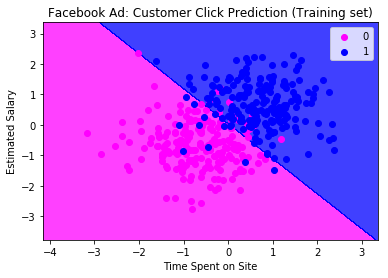

In [114]:
# plot the boundary using the trained classifier
# Run the classifier to predict the outcome on all pixels with resolution of 0.01
# Coloring the pixels with 0 or 1
# If classified as 0 it will be magenta, and if it is classified as 1 it will be shown in blue 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# plot all the actual training points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
    
plt.title('Facebook Ad: Customer Click Prediction (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [122]:
# Plotting an ROC curve
from sklearn.metrics import roc_curve, auc

In [126]:
fpr, tpr, thresholds = roc_curve(y_train, classifier.predict(X_train))
fpr
thresholds

roc_auc = auc(fpr, tpr)


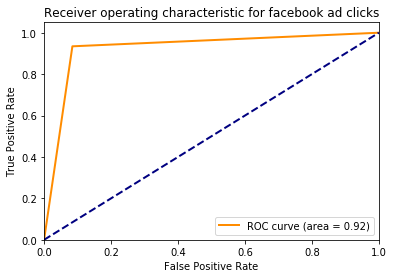

In [129]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for facebook ad clicks')
plt.legend(loc="lower right")
plt.show()